# Logistic Regression

Logistic Regression sebenarnya mirip dengan simple/multiple linear regression. hanya saja pada simple/multiple linear regression bekerja dengan output continu. sedangkan pada logistik akan menghasilkan probabilitas dan dengan pemisah tertentu dari probabilitas tersebut akan ditentukan masuk kedalam kelompok/kelas mana.

Sebagai contoh terdapat dataset umur vs aksi. bisa terlihat bahwa ini merupakan klasifikasi karena hanya 2 himpunan dari aksi yang ada yaitu 0 dan 1.

Tentu kita bisa membuat garis regresi dari dataset ini seperti gambar di bawah

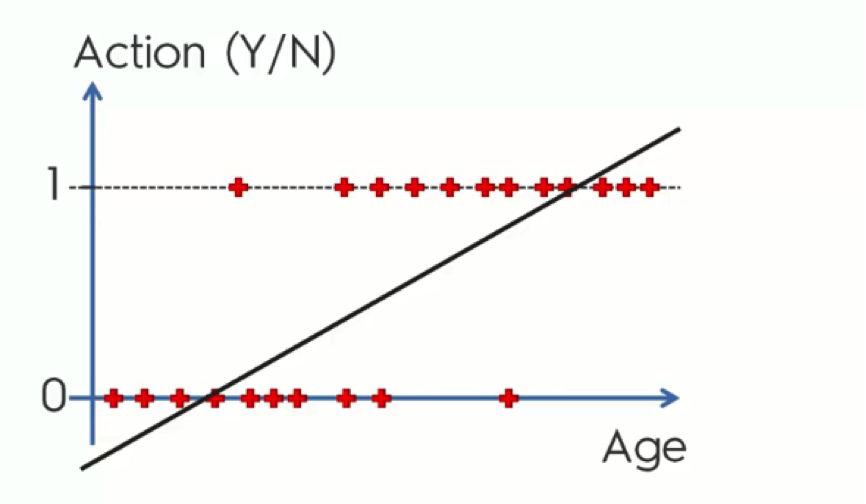

Dalam klasifikasi 2 himpunan ini tentu yang berada diatas 1 dan dibawah 0 tidak masuk akal, sehingga jika kita membuat yang diatas 1 menjadi 1 dan yang dibawah 0 menjadi 0 maka terlihat seperti garis datar.
dan tentu saja output antara 0 dan 1 tidak masuk akal karena hanya 2 himpunan. sehingga jika kita mengubah output garis regresi ini menjadi probabilitas bukan output yang sebenarnya. maka akan terasa lebih masuk akal. probabilitas ini dilambangkan p. dan jika kita ubah simple regression ini menjadi sigmoid function kita akan mendapatkan Logistic regression

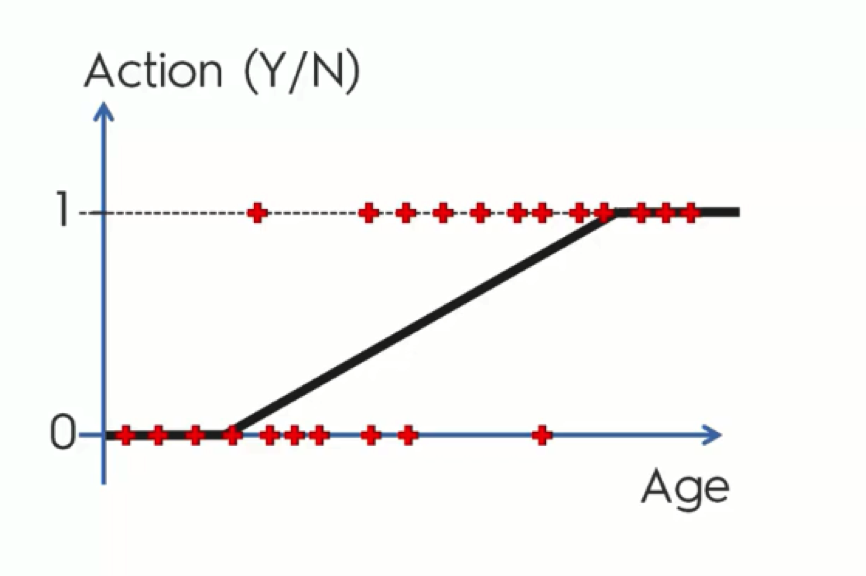

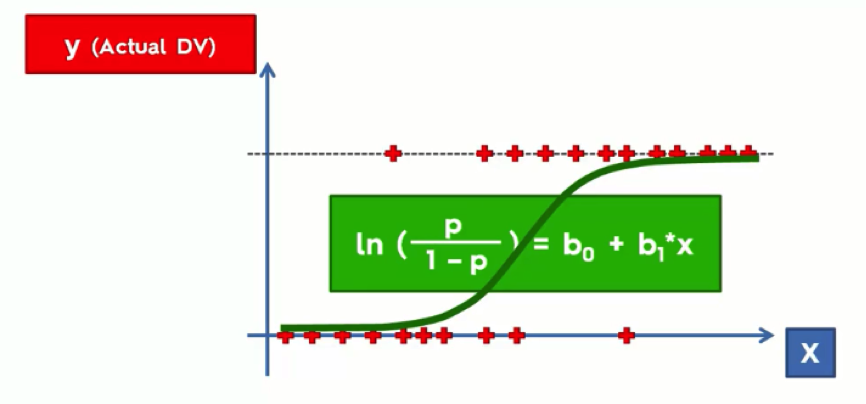

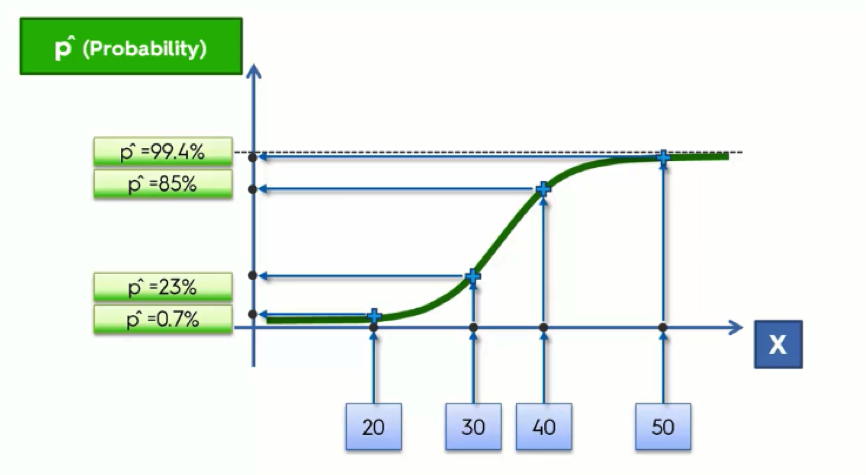

Karena kita hanya mendapatkan probabilitas kita perlu pemisah yang dapat menentukan apakah X masuk ke dalam himpunan 1 atau 0. dalam contoh ini digunakan garis pemisah 50% (0.5). sehingga probabilitas dibawah 0.5 dianggap kelas 0 dan 0.5 atau diatasnya dianggap kelas 1

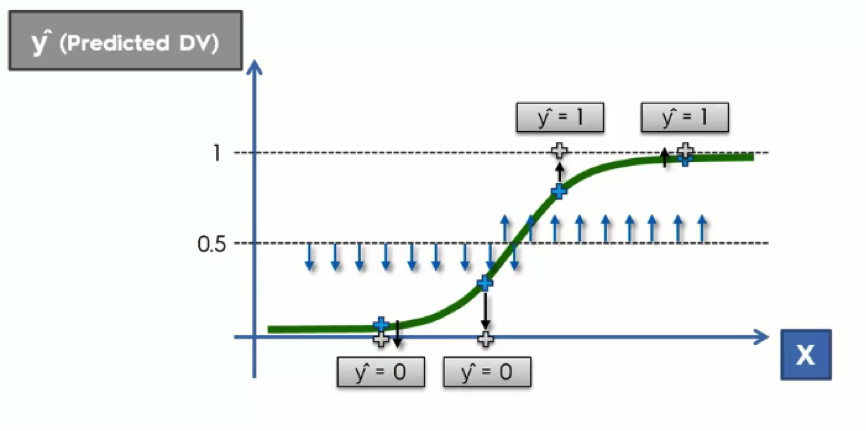

## Importing the libraries

In [15]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

## Importing the dataset

In [16]:
dataset = pd.read_csv("Social_Network_Ads.csv")

X=dataset.iloc[:,:-1].values
#1D
y=dataset.iloc[:,-1].values
#ubah 1D ke 2D

y=y.reshape(len(y),1)
dataset

,Age,EstimatedSalary,Purchased
0,19,19000,0
1,35,20000,0
2,26,43000,0
3,27,57000,0
4,19,76000,0
...,...,...,...
395,46,41000,1
396,51,23000,1
397,50,20000,1
398,36,33000,0


## Splitting the dataset into the Training set and Test set

In [17]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

320
80


## Feature Scaling

In [18]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
X_train_scaled=ss.fit_transform(X_train)

Mengaplikasikan feature scaling pada dataset bukanlah kewajiban namun dapat meningkatkan performa model

## Training the Logistic Regression model on the Training set

In [19]:
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression(random_state=0)
log_reg.fit(X_train_scaled,y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(random_state=0)

## Predicting a new result

In [20]:
X_new = np.array([[33,19500],[23,90000]])
# X_new = X_new.reshape(len(X_new[0]),1)
X_new_scaled = ss.transform(X_new)
print(X_new_scaled)
y_new_pred = log_reg.predict(X_new_scaled)
print(y_new_pred)

[[-0.50731858 -1.46100724]
 [-1.47942605  0.5815238 ]]
[0 0]


## Predicting the Test set results

In [21]:
X_test_scaled = ss.transform(X_test)
y_test_pred = log_reg.predict(X_test_scaled)
print(y_test_pred)
y_test_reshape_1D = y_test.reshape(1,len(y_test))[0]
print(y_test_reshape_1D)
TP = 0
TN = 0
FP = 0
FN = 0
for i in range(0,len(y_test_pred)):
  if(y_test_reshape_1D[i]==y_test_pred[i] and y_test_pred[i]==1):TP+=1
  if(y_test_reshape_1D[i]==y_test_pred[i] and y_test_pred[i]==0):TN+=1
  if(y_test_reshape_1D[i]!=y_test_pred[i] and y_test_pred[i]==1):FP+=1
  if(y_test_reshape_1D[i]!=y_test_pred[i] and y_test_pred[i]==0):FN+=1

print("TP : ",TP," TN : ",TN,"FP : ",FP,"FN : ",FN)
#Menghitung ulang akurasi dengan library
#score menandakan akurasi model
score = log_reg.score(X_test_scaled,y_test)
print((TN+TP)/len(y_test_pred))
print(score)

[0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 1 0 1 0 0 0 0 0 0 1 0 0 0 0
 0 0 1 0 0 0 0 1 0 0 1 0 1 1 0 0 0 1 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 1 0 0 0
 0 0 1 0 1 1]
[0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 1 0 1 0 0 0 0 0 1 1 0 0 0 0
 0 0 1 0 0 0 0 1 0 0 1 0 1 1 0 0 0 1 1 0 0 1 0 0 1 0 1 0 1 0 0 0 0 1 0 0 1
 0 0 0 0 1 1]
TP :  17  TN :  57 FP :  1 FN :  5
0.925
0.925


## Making the Confusion Matrix

In [22]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test,y_test_pred)

array([[57,  1],
       [ 5, 17]])

## Visualising the Training set results

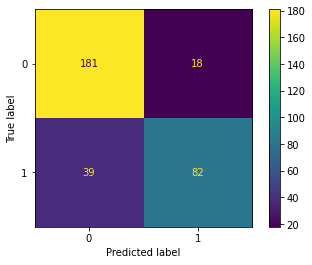

In [27]:
from sklearn.metrics import ConfusionMatrixDisplay
cmd = ConfusionMatrixDisplay.from_predictions(y_train,log_reg.predict(X_train_scaled))

## Visualising the Test set results

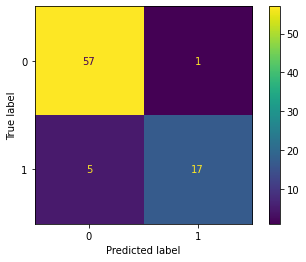

In [24]:
ConfusionMatrixDisplay.from_predictions(y_test,y_test_pred)